In [1]:
import pandas as pd
data=pd.read_csv('Downloads/spamfinal.csv')
data.head()

,Unnamed: 0,Category,Message,Emoji,Mathemtical symbols,URL,shorthands,Dot,length,capitals,Num_Phone,Special characters,word_count,mis_spell
0,0,ham,"Go until jurong point, crazy.. Available only ...",0,0,0,3,3,111,0,0,0,20,1
1,1,ham,Ok lar... Joking wif u oni...,0,0,0,3,2,29,0,0,0,6,1
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,0,0,3,0,155,2,1,1,28,1
3,3,ham,U dun say so early hor... U c already then say...,0,0,0,4,2,49,2,0,0,11,1
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0,0,1,0,61,1,0,0,13,1


In [4]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['Emoji', 'Mathemtical symbols', 'URL', 'shorthands','Dot','length','capitals','Num_Phone','Special characters','word_count','mis_spell']]  # Features
y=data['Category']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [5]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [6]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9623205741626795


In [8]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=['Emoji', 'Mathemtical symbols', 'URL', 'shorthands','Dot','length','capitals','Num_Phone','Special characters','word_count','mis_spell']).sort_values(ascending=False)
feature_imp

Num_Phone              0.261496
length                 0.209206
word_count             0.139789
capitals               0.104368
Mathemtical symbols    0.065272
mis_spell              0.051552
URL                    0.044794
shorthands             0.039838
Dot                    0.038227
Special characters     0.037781
Emoji                  0.007679
dtype: float64

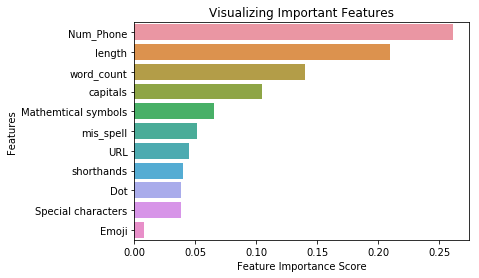

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [14]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
p=[]
r=[]
accuracy=[]
t=[0.5,0.4,0.3,0.2,0.1]
for i in t:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
    #Create a Gaussian Classifier
    clf=RandomForestClassifier(n_estimators=100)

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
    p.append(precision_score(y_test, y_pred, average="macro"))
    r.append(recall_score(y_test, y_pred, average="macro"))
    print("Precision",precision_score(y_test, y_pred, average="macro"))
    print("recall",recall_score(y_test, y_pred, average="macro"))     
    

Accuracy: 0.9669777458722182
Precision 0.9492614009314537
recall 0.9028942461538807
Accuracy: 0.9659039928218932
Precision 0.9498833848300607
recall 0.8967093814269894
Accuracy: 0.9694976076555024
Precision 0.9543660265119525
recall 0.9218623481781376
Accuracy: 0.9695067264573991
Precision 0.9499371859296483
recall 0.9034917082256805
Accuracy: 0.9802867383512545
Precision 0.9822616407982261
recall 0.9322981366459627


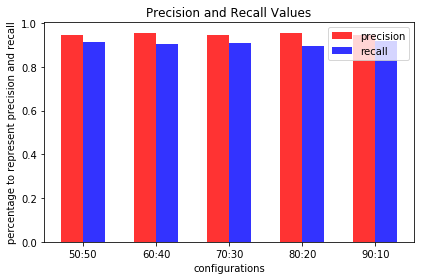

In [12]:
#plotting precision and recall
import matplotlib.pyplot as plt
import numpy as np
n_groups=5
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
rects1 = plt.bar(index, p, bar_width,
                 alpha=opacity,
                 color='r',
                 label='precision')
rects2 = plt.bar(index+bar_width, r, bar_width, alpha=opacity, color='b', label='recall')
plt.xlabel('configurations')
plt.ylabel('percentage to represent precision and recall')
plt.title('Precision and Recall Values')
plt.xticks(index+0.15, ('50:50', '60:40', '70:30', '80:20', '90:10'))
plt.legend()
 
plt.tight_layout()
plt.show()

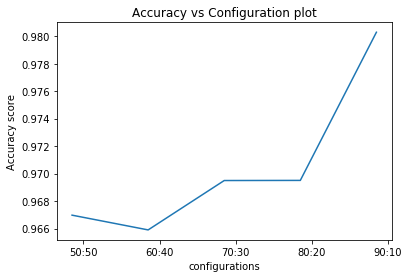

In [15]:
import matplotlib.pyplot as plt
n_groups=5
index = np.arange(n_groups)
plt.plot(accuracy)
plt.xlabel('configurations')
plt.ylabel('Accuracy score')
plt.title('Accuracy vs Configuration plot')
plt.xticks(index+0.15, ('50:50', '60:40', '70:30', '80:20', '90:10'))
 
plt.show()

In [21]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into features and labels
X=data[['Mathemtical symbols', 'URL', 'shorthands','length','capitals','Num_Phone','word_count','mis_spell']]  # Removed feature "sepal length"
y=data['Category']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

In [22]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9597539092540375
